## Libs

In [1]:
import pandas as pd
import numpy as np
import random 
import math
import csv

# Verifica propriedades

In [52]:
def media(arquivo_csv):
    propriedades = pd.read_csv(arquivo_csv,header=None,delimiter='\t')
    resultado = []
    for i in propriedades[0]:
        linha = i.split()
        if float(linha[1]) != 352 and float(linha[1]) != 1 and float(linha[4]) > 0:
            resultado.append(float(linha[4]))
    return sum(resultado)/len(resultado)

def blocos_alterados(arquivo_csv):
    propriedades = pd.read_csv(arquivo_csv,header=None,delimiter='\t')
    resultado = []
    for i in propriedades[0]:
        linha = i.split()
        if float(linha[1]) != 352 and float(linha[1]) != 1 and float(linha[4]) > 0:
            if float(linha[4]) == 1:
                resultado.append(float(linha[4]))
    return len(resultado)

def blocos_n_alterados(arquivo_csv):
    propriedades = pd.read_csv(arquivo_csv,header=None,delimiter='\t')
    resultado = []
    for i in propriedades[0]:
        linha = i.split()
        if float(linha[1]) != 352 and float(linha[1]) != 1 and float(linha[4]) > 0:
            if float(linha[4]) != 1:
                resultado.append(float(linha[4]))
    return len(resultado)

def calcula_bloco_laminar_por(por_amostra_vug):
    x = (por_amostra_vug * 78750 - 60900 * 0.2399528956) / 17850 # 3 laminas
    y = (por_amostra_vug * 78750 -38500 * 0.2399528956) / 40250 # 7 laminas
    return x,y

def calcula_bloco_laminar_perm(por_amostra_vug):
    x = (por_amostra_vug * 78750 - 60900 * 256) / 17850 # 3 laminas
    y = (por_amostra_vug * 78750 - 38500 * 256) / 40250 # 7 laminas
    return x,y

# Grids com possibilidade de definir geometria das heterogeneidades

In [7]:
def distancia_euclidiana(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    
    Arguments:
    point1 (tuple): Coordinates of the first point.
    point2 (tuple): Coordinates of the second point.
    
    Returns:
    float: Euclidean distance between the two points.
    """
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimensionality")
    
    squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    distance = math.sqrt(squared_distance)
    return distance

def cria_mapa_caso_d_alta(block_value_homo_perm, x, y, z, epsilon):
    '''Gera mapas de porosidade e permeabilidade de acordo com o caso d do artigo de 2019 do Maas'''
    faixa_central = (x//2)
    dimensao_z_por = []
    dimensao_z_perm = []
    ponto_central = (x//2,y//2)
    raio = x/2
    for i in range(0,z): # z
        plano_xy_por = []
        plano_xy_perm = []
        for j in range(0,x): # x
            for k in range(0,y): #y
                ponto = (j,k)
                if distancia_euclidiana(ponto_central,ponto) > raio:
                    plano_xy_por.append(0)
                    plano_xy_perm.append(0)
                else:
                    if i == 0 or i == z-1:
                        plano_xy_por.append(0.01)
                        plano_xy_perm.append(250000) 
                    #Define a largura da regiao inferior
                    elif k in range(faixa_central-epsilon,faixa_central+1+epsilon): 

                        por = 0.8941599001201986 # verificar valor

                        plano_xy_por.append(por)

                        perm = None # correlação k,phi

                        plano_xy_perm.append(perm)
                    #Define a largura da região superior
                    else:
                        perm = block_value_homo_perm
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
        dimensao_z_por.append(plano_xy_por)
        dimensao_z_perm.append(plano_xy_perm)
    return dimensao_z_por,dimensao_z_perm

## Funções

In [3]:
def distancia_euclidiana(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    
    Arguments:
    point1 (tuple): Coordinates of the first point.
    point2 (tuple): Coordinates of the second point.
    
    Returns:
    float: Euclidean distance between the two points.
    """
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimensionality")
    
    squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    distance = math.sqrt(squared_distance)
    return distance



def cria_mapa_caso_d_alta(block_value_homo_perm, x, y, z, epsilon):
    '''Gera mapas de porosidade e permeabilidade de acordo com o caso d do artigo de 2019 do Maas'''
    faixa_central = (x//2)
    dimensao_z_por = []
    dimensao_z_perm = []
    ponto_central = (x//2,y//2)
    raio = x/2
    for i in range(0,z): # z
        plano_xy_por = []
        plano_xy_perm = []
        for j in range(0,x): # x
            for k in range(0,y): #y
                ponto = (j,k)
                if distancia_euclidiana(ponto_central,ponto) > raio:
                    plano_xy_por.append(0)
                    plano_xy_perm.append(0)
                else:
                    if i == 0 or i == z-1:
                        plano_xy_por.append(0.01)
                        plano_xy_perm.append(250000) 
                    #Define a largura da regiao inferior
                    elif k in range(faixa_central-epsilon,faixa_central+1+epsilon): 
                        perm = block_value_homo_perm*1.5 #verificar o valor
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
                    #Define a largura da região superior
                    else:
                        perm = block_value_homo_perm
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
        dimensao_z_por.append(plano_xy_por)
        dimensao_z_perm.append(plano_xy_perm)
    return dimensao_z_por,dimensao_z_perm

def cria_mapa_caso_d_baixa(block_value_homo_perm, x, y, z, epsilon):
    '''Gera mapas de porosidade e permeabilidade de acordo com o caso d do artigo de 2019 do Maas'''
    faixa_central = (x//2)
    dimensao_z_por = []
    dimensao_z_perm = []
    ponto_central = (x//2,y//2)
    raio = x/2
    for i in range(0,z): # z
        plano_xy_por = []
        plano_xy_perm = []
        for j in range(0,x): # x
            for k in range(0,y): #y
                ponto = (j,k)
                if distancia_euclidiana(ponto_central,ponto) > raio:
                    plano_xy_por.append(0)
                    plano_xy_perm.append(0)
                else:
                    if i == 0 or i == z-1:
                        plano_xy_por.append(0.01)
                        plano_xy_perm.append(250000) 
                    #Define a largura da regiao inferior
                    elif k in range(faixa_central-epsilon,faixa_central+1+epsilon): 
                        perm = block_value_homo_perm*0.5 #verificar o valor
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
                    #Define a largura da região superior
                    else:
                        perm = block_value_homo_perm
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
        dimensao_z_por.append(plano_xy_por)
        dimensao_z_perm.append(plano_xy_perm)
    return dimensao_z_por,dimensao_z_perm

def cria_mapa_vugs(block_value_homo_perm, x, y, z, epsilon):
    '''Gera mapas de porosidade e permeabilidade de acordo com o caso d do artigo de 2019 do Maas'''
    faixa_central_xy = (x//2)
    razao_z_x = (3.81/17)/(5/352)
    faixa_central_z = (z//2)
    dimensao_z_por = []
    dimensao_z_perm = []
    ponto_central = (x//2,y//2)
    raio = x/2
    for i in range(0,z): # z
        plano_xy_por = []
        plano_xy_perm = []
        for j in range(0,x): # x
            for k in range(0,y): #y
                ponto = (j,k)
                if distancia_euclidiana(ponto_central,ponto) > raio:
                    plano_xy_por.append(0)
                    plano_xy_perm.append(0)
                else:
                    if i == 0 or i == z-1:
                        plano_xy_por.append(0.01)
                        plano_xy_perm.append(250000) 
                    #Define a região alterada
                    elif i in range(faixa_central_z - int(((epsilon+.5)*razao_z_x)//1), faixa_central_z + 1 + int(((epsilon+.5)*razao_z_x))//1) and j in range(faixa_central_xy - epsilon, faixa_central_xy + 1 + epsilon) and k in range(faixa_central_xy - epsilon, faixa_central_xy + 1 + epsilon):
                        # if j in range(faixa_central_xy - epsilon, faixa_central_xy + 1 + epsilon):
                        #     if k in range(faixa_central_xy - epsilon, faixa_central_xy + 1 + epsilon):
                        perm = 1000000
                        plano_xy_perm.append(perm)
                        por = 1
                        plano_xy_por.append(por)
                            
                    #Define a largura da região superior
                    else:
                        perm = block_value_homo_perm
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
        dimensao_z_por.append(plano_xy_por)
        dimensao_z_perm.append(plano_xy_perm)
    return dimensao_z_por,dimensao_z_perm


def format_cmg2(df,xd,yd,zd):
    '''Transforma os valores do DataFrame no formato do include
    Ex: 5 55 7 =   256 '''
    porosity = []
    y = yd # z = z(dimensão)
    for i in df.columns:
        x = xd # x = x(dimensão)
        z = zd
        for j in df[i]:
            entry = '{0} {1} {2} =   {3:.10f}'.format(x,y,z,j)
            porosity.append(entry)
            z -= 1
            if z == 0: # y = y(dimensão) + 1
                z = zd
                x -= 1
        y -= 1
    porosity_3dmap_cmg = pd.DataFrame(porosity)
    return porosity_3dmap_cmg

## Caso d

### Alta

#### Epsilon = 1

In [124]:
por_ep_1, perm_ep_1 = cria_mapa_caso_d_alta(256, x=17, y=17, z=352, epsilon=1) #(valor de permeabilidade, x, y, z, epsilon)
df_por_ep_1 = pd.DataFrame(por_ep_1)
df_perm_ep_1 = pd.DataFrame(perm_ep_1)
ndf_por_ep_1 = df_por_ep_1.T #transposta para o formato do include do cmg
ndf_perm_ep_1 = df_perm_ep_1.T
ndf_por_format_ep_1 = format_cmg2(ndf_por_ep_1,17,352,17) #formata o DataFrame para o include do cmg
ndf_perm_format_ep_1 = format_cmg2(ndf_perm_ep_1,17,352,17)

In [125]:
ndf_por_format_ep_1.to_csv('por_laminar_1_vug3.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_perm_format_ep_1.to_csv('perm_laminar_1_vug3.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

#### Epsilon = 3

In [160]:
por_ep_3, perm_ep_3 = cria_mapa_caso_d_alta(256, x=17, y=17, z=352, epsilon=3) #(valor de permeabilidade, x, y, z, epsilon)
df_por_ep_3 = pd.DataFrame(por_ep_3)
df_perm_ep_3 = pd.DataFrame(perm_ep_3)
ndf_por_ep_3 = df_por_ep_3.T #transposta para o formato do include do cmg
ndf_perm_ep_3 = df_perm_ep_3.T
ndf_por_format_ep_3 = format_cmg2(ndf_por_ep_3,17,352,17) #formata o DataFrame para o include do cmg
ndf_perm_format_ep_3 = format_cmg2(ndf_perm_ep_3,17,352,17)

In [161]:
ndf_por_format_ep_3.to_csv('por_laminar_3_vug13.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_perm_format_ep_3.to_csv('perm_laminar_3_vug13.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

### Baixa

#### Epsilon = 1

In [33]:
por_ep_1, perm_ep_1 = cria_mapa_caso_d_baixa(192, x=17, y=17, z=352, epsilon=1) #(valor de permeabilidade, x, y, z, epsilon)
df_por_ep_1 = pd.DataFrame(por_ep_1)
df_perm_ep_1 = pd.DataFrame(perm_ep_1)
ndf_por_ep_1 = df_por_ep_1.T #transposta para o formato do include do cmg
ndf_perm_ep_1 = df_perm_ep_1.T
ndf_por_format_ep_1 = format_cmg2(ndf_por_ep_1,17,352,17) #formata o DataFrame para o include do cmg
ndf_perm_format_ep_1 = format_cmg2(ndf_perm_ep_1,17,352,17)

In [34]:
ndf_por_format_ep_1.to_csv('por_caso_d_ep_1_baixa.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_perm_format_ep_1.to_csv('perm_caso_d_ep_1_baixa.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

#### Epsilon = 3

In [35]:
por_ep_3, perm_ep_3 = cria_mapa_caso_d_baixa(192, x=17, y=17, z=352, epsilon=3) #(valor de permeabilidade, x, y, z, epsilon)
df_por_ep_3 = pd.DataFrame(por_ep_3)
df_perm_ep_3 = pd.DataFrame(perm_ep_3)
ndf_por_ep_3 = df_por_ep_3.T #transposta para o formato do include do cmg
ndf_perm_ep_3 = df_perm_ep_3.T
ndf_por_format_ep_3 = format_cmg2(ndf_por_ep_3,17,352,17) #formata o DataFrame para o include do cmg
ndf_perm_format_ep_3 = format_cmg2(ndf_perm_ep_3,17,352,17)

In [36]:
ndf_por_format_ep_3.to_csv('por_caso_d_ep_3_baixa.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_perm_format_ep_3.to_csv('perm_caso_d_ep_3_baixa.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

## Vugs

In [44]:
por_vug, perm_vug = cria_mapa_vugs(256, x=17, y=17, z=352, epsilon=6) #(valor de permeabilidade, x, y, z, epsilon)
df_por_vug = pd.DataFrame(por_vug)
df_perm_vug = pd.DataFrame(perm_vug)
ndf_por_vug = df_por_vug.T #transposta para o formato do include do cmg
ndf_perm_vug = df_perm_vug.T
ndf_por_format_vug = format_cmg2(ndf_por_vug,17,352,17) #formata o DataFrame para o include do cmg
ndf_perm_format_vug = format_cmg2(ndf_perm_vug,17,352,17)

In [45]:
ndf_por_format_vug.to_csv('por_vug_13x13.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_perm_format_vug.to_csv('perm_vug_13x13.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

# Grids com heterogeneidade randômica

## Funções

In [7]:
def distancia_euclidiana(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    
    Arguments:
    point1 (tuple): Coordinates of the first point.
    point2 (tuple): Coordinates of the second point.
    
    Returns:
    float: Euclidean distance between the two points.
    """
    if len(point1) != len(point2):
        raise ValueError("Points must have the same dimensionality")
    
    squared_distance = sum((x - y) ** 2 for x, y in zip(point1, point2))
    distance = math.sqrt(squared_distance)
    return distance


def cria_mapa_het_var_3D_cil(block_value_homo_perm, x, y, z):
    dimensao_z_por = []
    dimensao_z_perm = []
    ponto_central = (x//2,y//2)
    raio = x/2
    for i in range(0,z): # z
        plano_xy_por = []
        plano_xy_perm = []
        for j in range(0,x): # x
            for k in range(0,y): #y
                ponto = (j,k)
                if distancia_euclidiana(ponto_central,ponto) > raio:
                    plano_xy_por.append(0)
                    plano_xy_perm.append(0)
                else:
                    if i == 0 or i == z-1:
                        plano_xy_por.append(0.01)
                        plano_xy_perm.append(250000) 
                    else: 
                        perm = block_value_homo_perm
                        plano_xy_perm.append(perm)
                        por = np.log(perm/0.1038)/0.3255/100 # correlação k,phi
                        plano_xy_por.append(por)
        dimensao_z_por.append(plano_xy_por)
        dimensao_z_perm.append(plano_xy_perm)
    return dimensao_z_por,dimensao_z_perm


def alter(df1,df2,faixa,homo_block_perm):
    '''Insere heterogeneidade em posições randômicas no mapa homogêneo
    Faixa = porcentagem de blocos a serem alterados
    Os blocos são alterados seguindo uma distribuição normal com desvio padrão de 20 e media = valor da permeabilidade na matriz'''
    blocos = 17*352*17 # blocos totais
    null_blocks = 16*4*352 # null blocks totais
    blocos_alt = 0
    while blocos_alt < (blocos-null_blocks)*faixa//1: # verifica se o número de blocos alterados é menor do que a porcentagem desejada de blocos da matriz rochosa a serem alterados
        a = random.randint(0,351)
        b = random.randint(0,17*17-1)
        if df2[a][b] == homo_block_perm:
            alt_perm = np.random.normal(homo_block_perm,30) # distribuição normal dos valores de permeabilidade
            alt_por = np.log(alt_perm/0.1038)/0.3255/100 # correlação k,phi
            df1.loc[b,a] = alt_por
            df2.loc[b,a] = alt_perm
            blocos_alt +=1
    return df1 , df2

def alter_all(df1,df2,homo_block_perm):
    '''Muda todos os blocos da matriz rochosa, seguindo a distribuição normal com desvio padrão de 20 e media = valor da permeabilidade na matriz'''
    for i in df2.columns:
        index = 0
        for j in df2[i]:
            if j == homo_block_perm:
                alt_perm = np.random.normal(homo_block_perm,30) # distribuição normal dos valores de permeabilidade
                alt_por = np.log(alt_perm/0.1038)/0.3255/100 # correlação k,phi
                df1.loc[index,i] = alt_por
                df2.loc[index,i] = alt_perm
            index += 1
    return df1 , df2


def format_cmg(df,xd,yd,zd):
    '''Transforma os valores do DataFrame no formato do include
    Ex: 5 55 7 =   256 '''
    porosity = []
    y = yd # z = z(dimensão)
    for i in df.columns:
        x = xd # x = x(dimensão)
        z = zd
        for j in df[i]:
            entry = '{0} {1} {2} =   {3:.10f}'.format(x,y,z,j)
            porosity.append(entry)
            z -= 1
            if z == 0: # y = y(dimensão) + 1
                z = zd
                x -= 1
        y -= 1
    porosity_3dmap_cmg = pd.DataFrame(porosity)
    return porosity_3dmap_cmg

## Heterogêneo

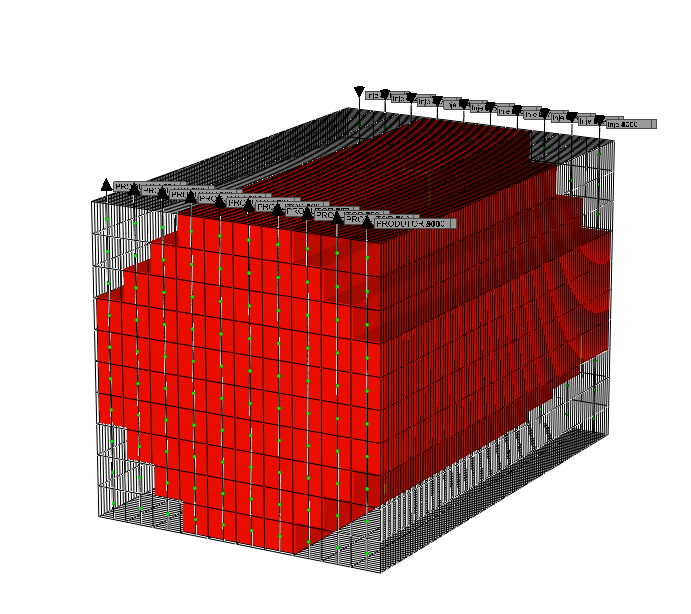   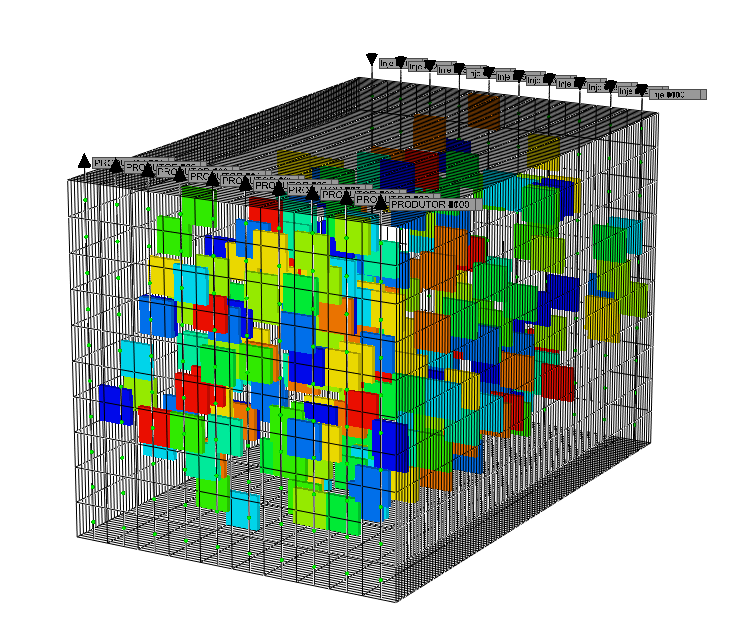

### Caso 0%

In [12]:
por_000, perm_000 = cria_mapa_het_var_3D_cil(192,17,17,352)

###########################################################

df_000 = pd.DataFrame(por_000)

df_000_perm = pd.DataFrame(perm_000)

###########################################################

ndf_000 = df_000.T

ndf_000_perm = df_000_perm.T

###########################################################

ndf_het_000 , ndf_het_000_perm = alter(ndf_000,ndf_000_perm,0.00,256)

###########################################################

ndf_het_000_format = format_cmg(ndf_het_000,17,352,17)

ndf_het_000_perm_format = format_cmg(ndf_het_000_perm,17,352,17)

In [13]:
ndf_het_000_format.to_csv('por_3d_het_000.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_het_000_perm_format.to_csv('perm_3d_het_000.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

### Caso 50%

In [14]:
por_050, perm_050 = cria_mapa_het_var_3D_cil(192,17,17,352)

###########################################################

df_050 = pd.DataFrame(por_050)

df_050_perm = pd.DataFrame(perm_050)

###########################################################

ndf_050 = df_050.T

ndf_050_perm = df_050_perm.T

###########################################################

ndf_het_050 , ndf_het_050_perm = alter(ndf_050,ndf_050_perm,0.50,192)

###########################################################

ndf_het_050_format = format_cmg(ndf_het_050,17,352,17)

ndf_het_050_perm_format = format_cmg(ndf_het_050_perm,17,352,17)

C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_112568\3979374837.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '139.26252409641933' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[b,a] = alt_perm
C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_112568\3979374837.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '252.65154725712384' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[b,a] = alt_perm
C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_112568\3979374837.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '179.96906055437987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.

In [15]:
ndf_het_050_format.to_csv('por_3d_het_050.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_het_050_perm_format.to_csv('perm_3d_het_050.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')

### Caso 100%

In [3]:
por_100, perm_100 = cria_mapa_het_var_3D_cil(192,17,17,352)

###########################################################

df_100 = pd.DataFrame(por_100)

df_100_perm = pd.DataFrame(perm_100)

###########################################################

ndf_100 = df_100.T

ndf_100_perm = df_100_perm.T

###########################################################

ndf_het_100 , ndf_het_100_perm = alter_all(ndf_100,ndf_100_perm,192)

###########################################################

ndf_het_100_format = format_cmg(ndf_het_100,17,352,17)

ndf_het_100_perm_format = format_cmg(ndf_het_100_perm,17,352,17)

C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_133572\1945589680.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '227.25977400500423' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[index,i] = alt_perm
C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_133572\1945589680.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '185.97842365381607' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[index,i] = alt_perm
C:\Users\kauahn.fonseca\AppData\Local\Temp\ipykernel_133572\1945589680.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '187.246435880138' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [4]:
ndf_het_100_format.to_csv('por_3d_het_100.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')
ndf_het_100_perm_format.to_csv('perm_3d_het_100.inc',sep=' ',header=None, index = False, quoting = csv.QUOTE_NONE, escapechar = ' ')